# AirBnB data EDA: feature correlations

# 1. Import required modules 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [10]:
import pandas as pd

data_df = pd.read_csv("/workspaces/Madesh-gperdrizet-data-preprocessing-project-tutorial/AB_NYC_2019.csv")
data_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# 2. Categorical features 

## 2.1 "Neighborhood group" vs "room type" 

### 2.1.1 Chi-squared test 

In [12]:
neighborhood_vs_room = data_df.groupby(['neighbourhood_group', 'room_type']).size()
print(neighborhood_vs_room)

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64


In [17]:
chisquared_test= stats.chisquare(neighborhood_vs_room)
print(f'Chi-squared p-value : {chisquared_test.pvalue:.2f}')

Chi-squared p-value : 0.00


### 2.1.2 Distribution plot  

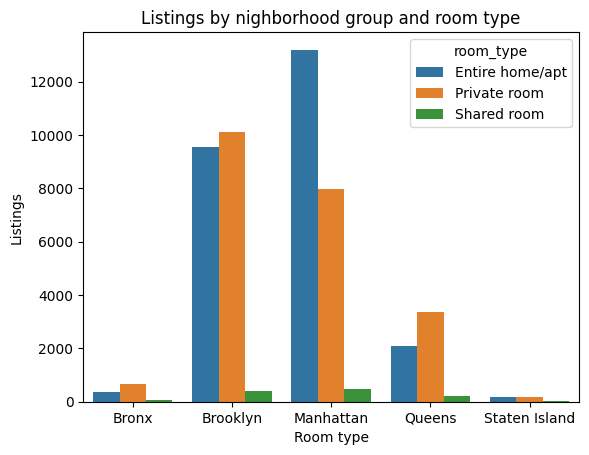

In [18]:
neighborhood_vs_room=data_df.groupby(['neighbourhood_group', 'room_type']).size()
neighborhood_vs_room_df=neighborhood_vs_room.reset_index()
neighborhood_vs_room_df.rename({0: 'Listings'}, axis=1, inplace=True)

plt.title('Listings by nighborhood group and room type')
sns.barplot(neighborhood_vs_room_df, x='neighbourhood_group', y='Listings', hue='room_type')
plt.xlabel('Room type')

plt.show()